# Comparacion de mediciones
nivel de prioridad: $\color{yellow}{Medio}$

$\textbf{Tarea de mariano:}$ ver la diferencia entre las señales de calibración del 27/05 y 09/06. Para mí debería haber solo un factor de escala, la chapa oxidada en principio refleja menos. Pero quizá haya algo dependiendo de la frecuencia. Habría que verlo.

Vamos a graficar las medicioes de mayo y junio para ver que paso con la amplitud. La diferencia aca tiene que ser en las mediciones S1 de calibracion porque usamos la chapa oxidada y la seguda chapa que encontramos. Las S2 en principio deberian dar bien y similares

In [59]:
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftfreq, fftshift
from scipy import stats

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


import os

In [60]:
%run mediciones_09_06/FFT_ordenada.ipynb

In [61]:
## Parámetros de la medición

Fs = 23.328e9 #Frecuencia de muestreo [Hz] 
Ts = 1/Fs
BW = 1.5e9 

portadora = 'Fc8'
Fc, fc = '8.74GHz', 8.748e9
alturas = ['1','2','3','4']
Ds = ['45cm', '65cm', '85cm']

#los "numeros" validos son 1, 2, 3
Numero = 3
altura = alturas[Numero] 
D= Ds[Numero-1]

In [62]:
##----------------PREPROCESAMIENTO DE LAS SEÑALES----------------------------##

sistema = 'windows'

if sistema == 'ubuntu':
    print(completar)
    ##----Ubuntu----##
    #código para gordotony#
    path_1 = '/home/gordotony/Documents/GitHub/tesis/mediciones_27_05/'
    path_2 = '/home/gordotony/Documents/GitHub/tesis/mediciones_09_06/'
    
    #para 27/05:
    # cuento el número de archivos S1 en el directorio
    med1_s1 = os.listdir(path_1+'/S1/'+portadora+'/'+altura+'/')
    N_med1_s1 = int(len(med1_s1))
    print('# mediciones para S1(mayo) =',N_med1_s1)

    # miro la longitud de cada medición S1
    L1_data_S1 = np.zeros(N_med1_s1, dtype=int)

    for i in range(N_med1_s1): 
        I = str(i+1)
        len1_data_S1 = int(len(open(path_1+'/S1/'+portadora+'/'+altura+'/'+I+'_S1.txt').readlines()))
        L1_data_S1[i] = len1_data_S1
        print('medición #'+I+' =',len1_data_S1)
    print()

    # cuento el número de archivos S2 en el directorio
    med1_s2 = os.listdir(path_1+'/S2/'+portadora+'/'+altura+'/')
    N_med1_s2 = int(len(med1_s2))
    print('# mediciones para S2(mayo) =',N_med1_s2)

    # miro la longitud de cada medición S2
    L1_data_S2 = np.zeros(N_med1_s2, dtype=int)

    for i in range(N_med1_s2): 
        I = str(i+1)
        len1_data_S2 = int(len(open(path_1+'/S2/'+portadora+'/'+altura+'/'+I+'_S2.txt').readlines()))
        L1_data_S2[i] = len1_data_S2
        print('medición #'+I+' =',len1_data_S2)

    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

    #para 09/06:
    # cuento el número de archivos S1 en el directorio
    med2_s1 = os.listdir(path_2+'/S1/'+portadora+'/'+altura+'/')
    N_med2_s1 = int(len(med2_s1))
    print('# mediciones para S1(mayo) =',N_med2_s1)

    # miro la longitud de cada medición S1
    L2_data_S1 = np.zeros(N_med2_s1, dtype=int)

    for i in range(N_med2_s1): 
        I = str(i+1)
        len2_data_S1 = int(len(open(path_2+'/S1/'+portadora+'/'+altura+'/'+I+'_S1.txt').readlines()))
        L2_data_S1[i] = len2_data_S1
        print('medición #'+I+' =',len2_data_S1)
    print()

    # cuento el número de archivos S2 en el directorio
    med2_s2 = os.listdir(path_2+'/S2/'+portadora+'/'+altura+'/')
    N_med2_s2 = int(len(med2_s2))
    print('# mediciones para S2(mayo) =',N_med2_s2)

    # miro la longitud de cada medición S2
    L2_data_S2 = np.zeros(N_med2_s2, dtype=int)

    for i in range(N_med2_s2): 
        I = str(i+1)
        len2_data_S2 = int(len(open(path_2+'/S2/'+portadora+'/'+altura+'/'+I+'_S2.txt').readlines()))
        L2_data_S2[i] = len2_data_S2
        print('medición #'+I+' =',len2_data_S2)

    print('Si los tamaños de todas las medicioes son iguales se puede cotinuar, sino hay que recortar los archivos')
    
elif sistema == 'windows': 
    ##----Windows----##
    #codigo para coraline#
    path_1 = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_27_05'
    path_2 = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_09_06'
    

    #para 27/05:
    # cuento el número de archivos S1 en el directorio
    med1_s1 = os.listdir(path_1+'\\S1\\'+portadora+'\\'+altura+'\\')
    N_med1_s1 = int(len(med1_s1))
    print('# mediciones para S1(mayo) =',N_med1_s1)

    # miro la longitud de cada medición S1
    L1_data_S1 = np.zeros(N_med1_s1, dtype=int)

    for i in range(N_med1_s1): 
        I = str(i+1)
        len1_data_S1 = int(len(open(path_1+'\\S1\\'+portadora+'\\'+altura+'\\'+I+'_S1.txt').readlines()))
        L1_data_S1[i] = len1_data_S1
        print('medición #'+I+' =',len1_data_S1)
    print()

    # cuento el número de archivos S2 en el directorio
    med1_s2 = os.listdir(path_1+'\\S2\\'+portadora+'\\'+altura+'\\')
    N_med1_s2 = int(len(med1_s2))
    print('# mediciones para S2(mayo) =',N_med1_s2)

    # miro la longitud de cada medición S2
    L1_data_S2 = np.zeros(N_med1_s2, dtype=int)

    for i in range(N_med1_s2): 
        I = str(i+1)
        len1_data_S2 = int(len(open(path_1+'\\S2\\'+portadora+'\\'+altura+'\\'+I+'_S2.txt').readlines()))
        L1_data_S2[i] = len1_data_S2
        print('medición #'+I+' =',len1_data_S2)

    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

    #para 09/06:
    # cuento el número de archivos S1 en el directorio
    med2_s1 = os.listdir(path_2+'\\S1\\'+portadora+'\\'+altura+'\\')
    N_med2_s1 = int(len(med2_s1))
    print('# mediciones para S1(mayo) =',N_med2_s1)

    # miro la longitud de cada medición S1
    L2_data_S1 = np.zeros(N_med2_s1, dtype=int)

    for i in range(N_med2_s1): 
        I = str(i+1)
        len2_data_S1 = int(len(open(path_2+'\\S1\\'+portadora+'\\'+altura+'\\'+I+'_S1.txt').readlines()))
        L2_data_S1[i] = len2_data_S1
        print('medición #'+I+' =',len2_data_S1)
    print()

    # cuento el número de archivos S2 en el directorio
    med2_s2 = os.listdir(path_2+'\\S2\\'+portadora+'\\'+altura+'\\')
    N_med2_s2 = int(len(med2_s2))
    print('# mediciones para S2(mayo) =',N_med2_s2)

    # miro la longitud de cada medición S2
    L2_data_S2 = np.zeros(N_med2_s2, dtype=int)

    for i in range(N_med2_s2): 
        I = str(i+1)
        len2_data_S2 = int(len(open(path_2+'\\S2\\'+portadora+'\\'+altura+'\\'+I+'_S2.txt').readlines()))
        L2_data_S2[i] = len2_data_S2
        print('medición #'+I+' =',len2_data_S2)

    print('Si los tamaños de todas las medicioes son iguales se puede cotinuar, sino hay que recortar los archivos')
    
else:
    print('elegir sistema operativo')


# mediciones para S1(mayo) = 10
medición #1 = 285
medición #2 = 285
medición #3 = 285
medición #4 = 285
medición #5 = 285
medición #6 = 285
medición #7 = 285
medición #8 = 285
medición #9 = 285
medición #10 = 285

# mediciones para S2(mayo) = 10
medición #1 = 285
medición #2 = 285
medición #3 = 285
medición #4 = 285
medición #5 = 285
medición #6 = 285
medición #7 = 285
medición #8 = 285
medición #9 = 285
medición #10 = 285
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# mediciones para S1(mayo) = 5
medición #1 = 285
medición #2 = 285
medición #3 = 285
medición #4 = 285
medición #5 = 285

# mediciones para S2(mayo) = 5
medición #1 = 285
medición #2 = 285
medición #3 = 285
medición #4 = 285
medición #5 = 285
Si los tamaños de todas las medicioes son iguales se puede cotinuar, sino hay que recortar los archivos


In [63]:
#las alturas so las mismas, todo ok
#Importamos las mediciones

if sistema == 'ubuntu':
    print('COMPLETAR')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
elif sistema =='windows':

    #mediciones 27/05
    S11 = np.zeros((int(len1_data_S1-1),11,N_med1_s1),dtype=float)
    S21 = np.zeros((int(len1_data_S2-1),11,N_med1_s1),dtype=float)
    #N_med1_s1 = N_med2_s2 xq son de la misma tirada de mediciones
    for i0 in range(N_med1_s1):
        I0 = str(i0+1)
        S11[:,:,i0] = np.genfromtxt(path_1+'\\S1\\'+portadora+'\\'+altura+'\\'+I0+'_S1.txt', delimiter=' ')
        S21[:,:,i0] = np.genfromtxt(path_1+'\\S2\\'+portadora+'\\'+altura+'\\'+I0+'_S2.txt', delimiter=' ')
    
    #mediciones 09/06
    S12 = np.zeros((int(len2_data_S1-1),11,N_med1_s1),dtype=float)
    S22 = np.zeros((int(len2_data_S1-1),11,N_med1_s1),dtype=float)
    #N_med2_s1 = N_med2_s2 xq so de la misma tirada de mediciones
    for i1 in range(N_med2_s1):
        I1 = str(i1+1)
        S12[:,:,i1] = np.genfromtxt(path_2+'\\S1\\'+portadora+'\\'+altura+'\\'+I1+'_S1.txt', delimiter=' ')
        S22[:,:,i1] = np.genfromtxt(path_2+'\\S2\\'+portadora+'\\'+altura+'\\'+I1+'_S2.txt', delimiter=' ')

else:
    print('defnir sistema operativo')

las dimensiones de los vectores promediados son:
S1 =  (284,)
S2 =  (284,)

las dimensiones de los vectores promediados son:
S1 =  (284,)
S2 =  (284,)



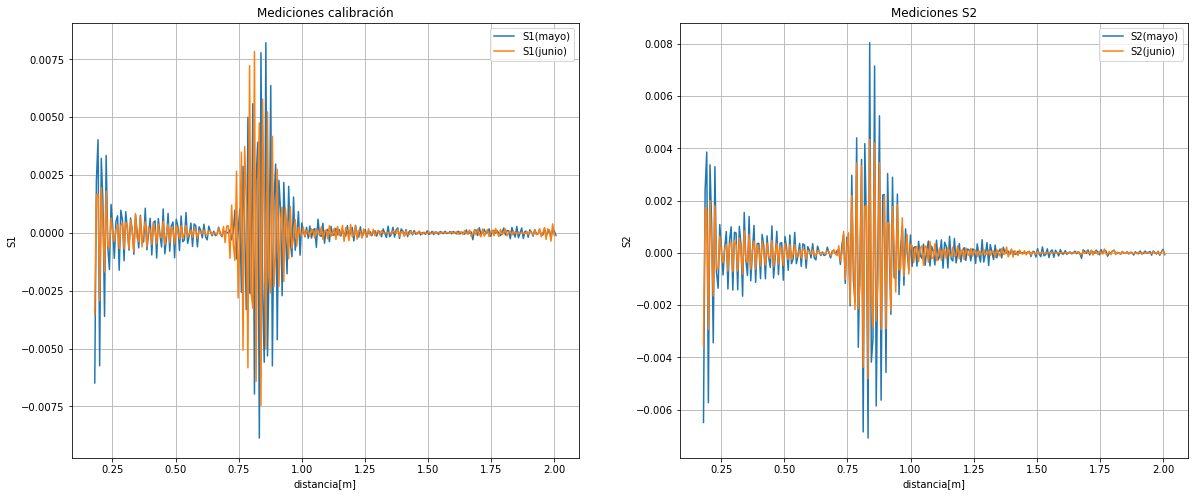

In [64]:
#promediamos

#mediciones 27/05
dist_1 = S11[:,0,0]
S11_avg = np.mean(S11[:,1:,0:], axis=(1,2))
S21_avg = np.mean(S21[:,1:,0:],axis=(1,2))
print('las dimensiones de los vectores promediados son:')
print('S1 = ',np.shape(S11_avg))
print('S2 = ',np.shape(S21_avg))
print()
#mediciones 09/05
dist_2 = S12[:,0,0]
S12_avg = np.mean(S12[:,1:,0:],axis=(1,2))
S22_avg = np.mean(S22[:,1:,0:],axis=(1,2))
print('las dimensiones de los vectores promediados son:')
print('S1 = ',np.shape(S12_avg))
print('S2 = ',np.shape(S22_avg))
print()

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Graficos
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ax[0].plot(dist_1,S11_avg,label='S1(mayo)')
ax[0].plot(dist_2,S12_avg,label='S1(junio)')
ax[0].grid('on')
ax[0].set_xlabel('distancia[m]')
ax[0].set_ylabel('S1')
ax[0].set_title('Mediciones calibración')
ax[0].legend(loc="best")

ax[1].plot(dist_1,S21_avg,label='S2(mayo)')
ax[1].plot(dist_2,S22_avg,label='S2(junio)')
ax[1].grid('on')
ax[1].set_xlabel('distancia[m]')
ax[1].set_ylabel('S2')
ax[1].set_title('Mediciones S2')
ax[1].legend(loc="best")

plt.show()


In [65]:
#Transformo fourier
Nfft= 1024

S11_fft = np.zeros(Nfft,dtype=complex)
S21_fft = np.zeros(Nfft,dtype=complex)
S12_fft = np.zeros(Nfft,dtype=complex)
S22_fft = np.zeros(Nfft,dtype=complex)

frec_fft, S11_fft = FFT_ordenada(S11_avg,Nfft,Ts)
S21_fft = FFT_ordenada(S21_avg,Nfft,Ts)[1]
S12_fft = FFT_ordenada(S12_avg,Nfft,Ts)[1]
S22_fft = FFT_ordenada(S22_avg,Nfft,Ts)[1]

#corto frecuecias
Deltaf = 1.75e9
f_min = fc-Deltaf
f_max = fc+Deltaf
#f_min, f_max = 6.5e9, 11e9

f_pos = frec_fft[(frec_fft>f_min) & (frec_fft<f_max)]
n_frecs = len(f_pos)
start = int(np.min(np.where(frec_fft>f_min)))
end = int(np.max(np.where(frec_fft<f_max))+1)
f_norm = f_pos/1e9 # frec >0 normalizada en GHz

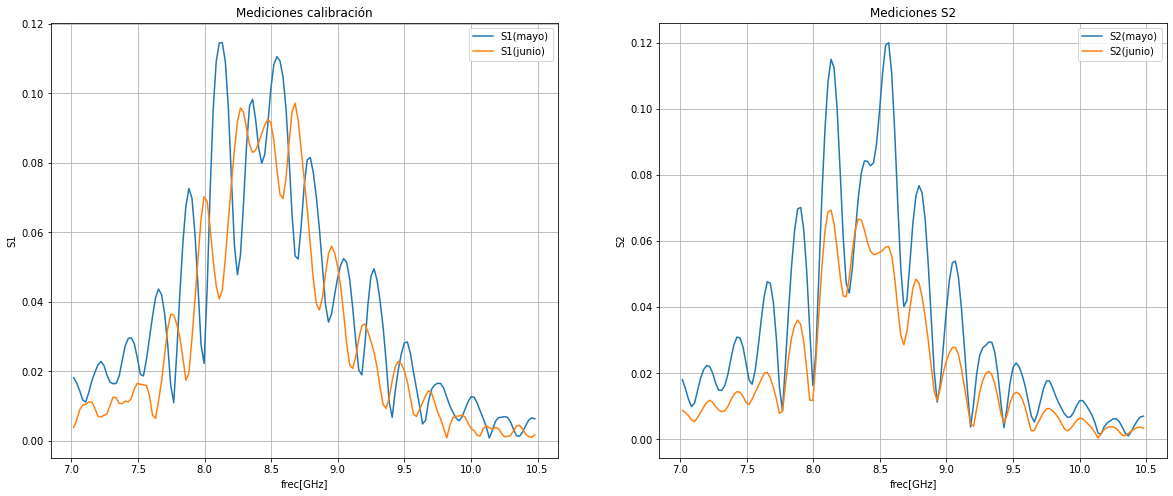

In [66]:
#Graficos
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ax[0].plot(f_norm,np.abs(S11_fft[start:end]),label='S1(mayo)')
ax[0].plot(f_norm,np.abs(S12_fft[start:end]),label='S1(junio)')
ax[0].grid('on')
ax[0].set_xlabel('frec[GHz]')
ax[0].set_ylabel('S1')
ax[0].set_title('Mediciones calibración')
ax[0].legend(loc="best")

ax[1].plot(f_norm,np.abs(S21_fft[start:end]),label='S2(mayo)')
ax[1].plot(f_norm,np.abs(S22_fft[start:end]),label='S2(junio)')
ax[1].grid('on')
ax[1].set_xlabel('frec[GHz]')
ax[1].set_ylabel('S2')
ax[1].set_title('Mediciones S2')
ax[1].legend(loc="best")

plt.show()

## Conclusiones:

> **Altura 1:** En la medicion de 45cm del suelo tenemos que S1 con la chapa oxidada tiene mayor amplitud que la medicion de julio. La medicion de julio ademas presenta esa oscilacion rara en el pico donde pierde amplitud que no podemos explicar. 
Mirando la medicion S2 de la misma altura, las mediciones de mayo siguen teniendo mayor amplitud que las de junio (la amplitud de mayo es el doble) Si vemos las mediciones de humedad con el hydra, se puede ver que la humedad de mayo da mayor que la de junio. El contenido de agua en tierra refleja la señal del radar por lo que tiene sentido que en mayo tengamos mas amplitud en S2.

> **Altura 2:** En la medicion a 65cm del suelo, S1 de mayo sigue siendo mayor que la de juio, pero esta vez no esta la oscilacion rara. los subpicos que se ven son mas equitativos digamos.
Las mediciones para S" siguenpresentando la diferencia de amplitud mencionada antes pero ahora el salto es mayor. Las oscilaciones parecen estar en fase.

> **Altura 3:** Estas mediciones ya tienen muchas oscilaciones que no sabemos de donde salen. Seria razonable pensar que estamos lo suficientemente lejos del suelo como para que haya interferencia constructiva y destructiva que venga de la superficie rugosa en S2 pero como TAMBIEN se da en S! todo se vuelve mas sospechoso. S1 de mayo sigue por encima de S1 de Junio pero en el mismo orden de magnitud. 
Para S2 tenemos de vuelta que los puntos maximos de mayo son el doble que los de juio atribuible al contenido de agua en el suelo. Las suboscilaciones estan en fase.


$\color{red}{Humedades:}\\$
27/05:

$2cm \rightarrow 0.318\\$
$2.5cm \rightarrow 0.292\\$
$6.5cm \rightarrow 0.348\\$

09/06: 

$2.5cm\rightarrow 0.19\\$
$7cm \rightarrow 0.227\\$